## Monty Hall Problem

In [44]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "doors.png")

In [30]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [46]:
'other_goat'>='other_goat'

True

In [47]:
goats = make_array('first goat', 'second goat')

In [48]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'], dtype='<U11')

In [49]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [52]:
monty_hall_game()

['car', 'first goat', 'second goat']

In [54]:
monty_hall_game()

['second goat', 'first goat', 'car']

In [55]:
# empty collection table
games = Table(['Guess', 'Revealed', 'Remaining'])

# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games.append(monty_hall_game())

In [56]:
games.show(10)

Guess,Revealed,Remaining
second goat,first goat,car
car,second goat,first goat
car,second goat,first goat
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car
car,first goat,second goat


In [57]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3307
first goat,3291
second goat,3402


In [58]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6693
first goat,1631
second goat,1676


In [59]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3307,6693
first goat,3291,1631
second goat,3402,1676


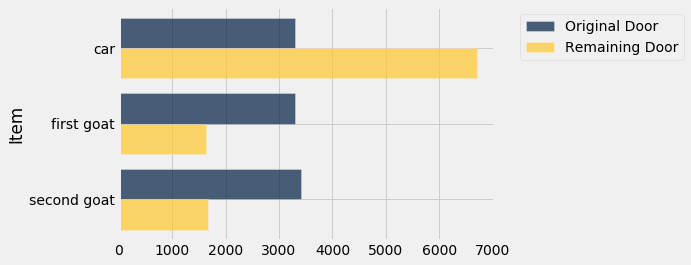

In [60]:
combined.barh(0)